# Sales Forecasting for Furniture Store

Welcome to the Machine Learning project, focused on forecasting the sales of a furniture store. In this
project, you will delve into the world of time series analysis, exploring various techniques to predict
sales and optimize inventory for sustained business operations.

1. Problem statment [Here](https://drive.google.com/drive/folders/1goatdInrj9bym2udFX0zWbslhHu4ItRJ)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd

# Direct link to the CSV file
csv_url = "/content/Super_Store_data.csv"

# Read CSV into DataFrame, specifying the encoding as 'latin-1'
df = pd.read_csv(csv_url, encoding='latin-1')

# Now you can work with the DataFrame 'df'
print(df.head())  # Display first few rows of the DataFrame


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

In [ ]:
df.shape

(2121, 21)

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Row ID           0
Postal Code      0
Discount         0
Quantity         0
Sales            0
Product Name     0
Sub-Category     0
Category         0
Product ID       0
Region           0
State            0
Order ID         0
City             0
Country          0
Segment          0
Customer Name    0
Customer ID      0
Ship Mode        0
Ship Date        0
Order Date       0
Profit           0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
features = df[['Segment','Country','City','State','Sales']]
top_10_sales = features.nlargest(10, 'Sales')
print('Top 10 Sales Revenue')
print(top_10_sales[['Segment','Country','City','State','Sales']])

Top 10 Sales Revenue
        Segment        Country           City           State     Sales
1517   Consumer  United States   Philadelphia    Pennsylvania  4416.174
2063  Corporate  United States     Burlington         Vermont  4404.900
2044   Consumer  United States        Concord  North Carolina  4297.644
1232   Consumer  United States  New York City        New York  4228.704
1365   Consumer  United States        Buffalo        New York  4007.840
2001   Consumer  United States  New York City        New York  3785.292
259    Consumer  United States         Fresno      California  3610.848
1070  Corporate  United States        Detroit        Michigan  3504.900
2047   Consumer  United States    Los Angeles      California  3406.664
2092  Corporate  United States        Seattle      Washington  3393.680


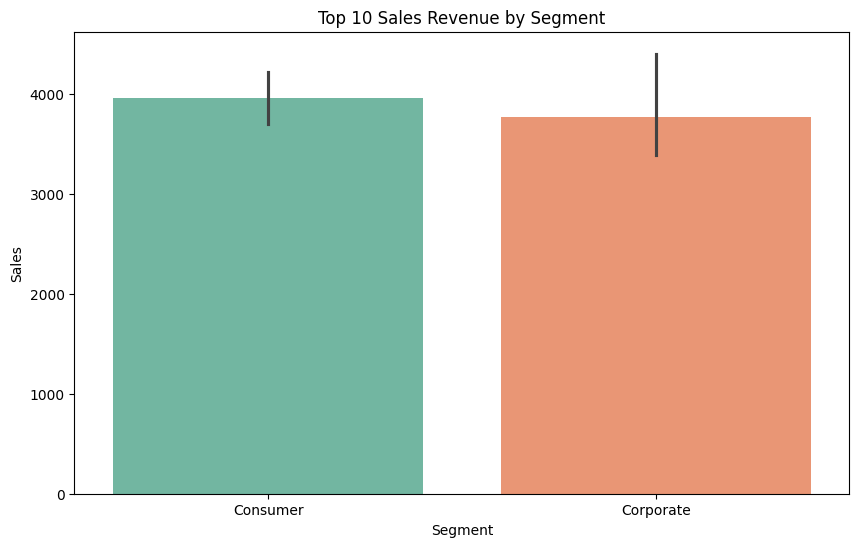

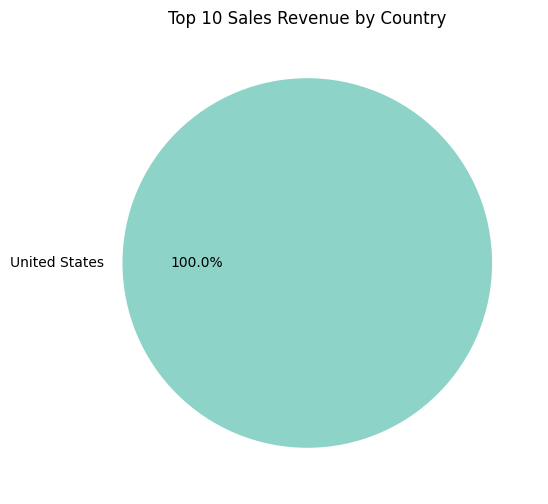

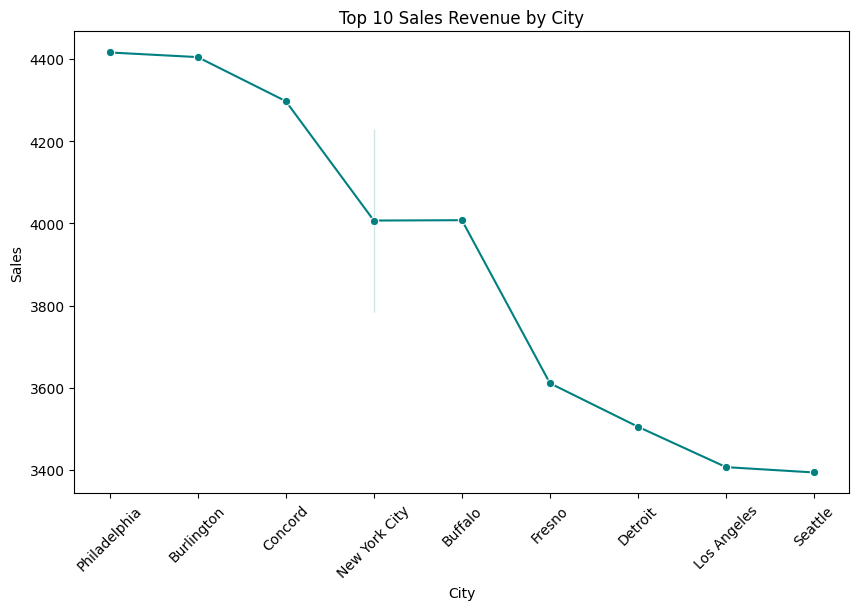

In [ ]:
# prompt: appropriate visualizations for the variable top_10_sales

# Create a bar plot to visualize the top 10 sales revenue by Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=top_10_sales, palette='Set2')
plt.title('Top 10 Sales Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

# Create a pie chart to visualize the top 10 sales revenue by Country
plt.figure(figsize=(10, 6))
labels = top_10_sales['Country'].value_counts().index.to_list()
colors = sns.color_palette('Set3', len(labels))
plt.pie(top_10_sales['Country'].value_counts(), labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Top 10 Sales Revenue by Country')
plt.show()

# Create a line plot to visualize the top 10 sales revenue by City
plt.figure(figsize=(10, 6))
sns.lineplot(x='City', y='Sales', data=top_10_sales, marker='o', color='teal')
plt.title('Top 10 Sales Revenue by City')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['Profit'].describe()

count    2121.000000
mean        8.699327
std       136.049246
min     -1862.312400
25%       -12.849000
50%         7.774800
75%        33.726600
max      1013.127000
Name: Profit, dtype: float64

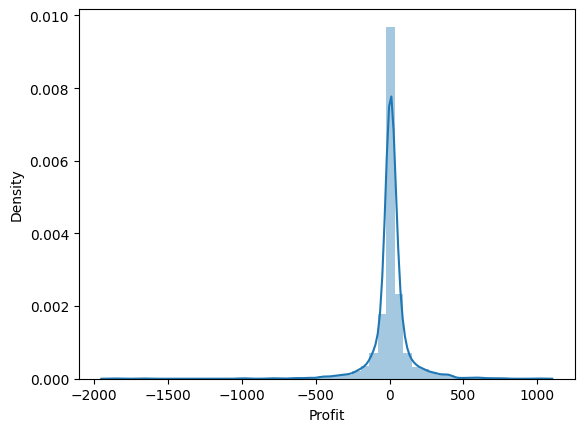

In [ ]:
sns.distplot(df['Profit']);

In [ ]:
print("Skewness: %f" % df['Profit'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

Skewness: -2.285456
Kurtosis: 15.916810


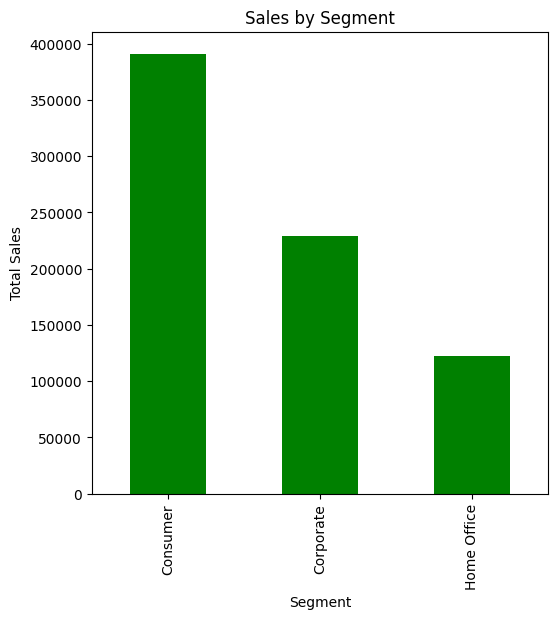

In [ ]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.subplot(1,3,1)
segment_sales.plot(kind='bar',color='green')
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

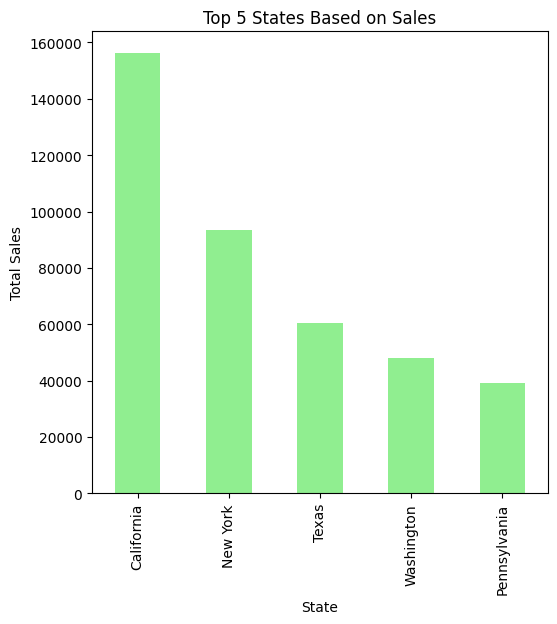

In [ ]:
segment_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(20,6))
plt.subplot(1,3,3)
segment_sales.plot(kind='bar',color='lightgreen')
plt.title('Top 5 States Based on Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

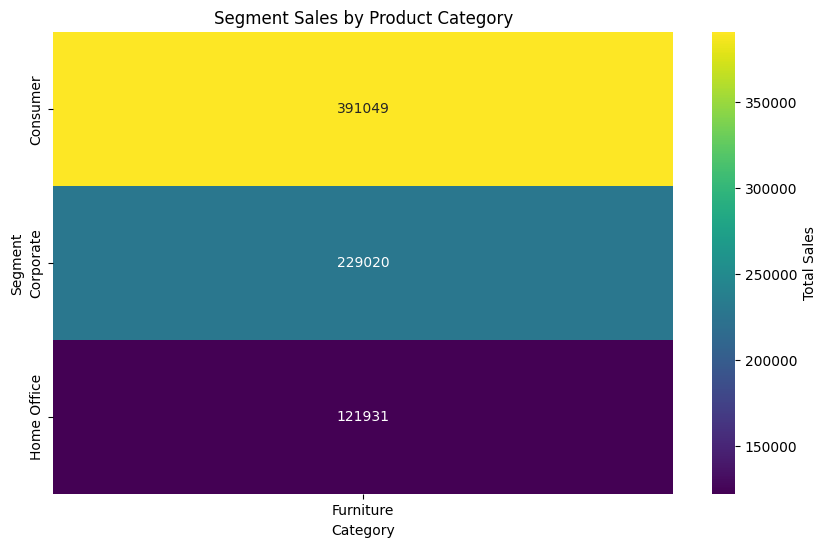

In [ ]:
heatmap_data = df.pivot_table(index='Segment', columns='Category', values='Sales', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.0f', cbar_kws={'label':'Total Sales'})
plt.title("Segment Sales by Product Category")
plt.show()

# Time Series Analysis

In [ ]:
df['year'] = df['Order Date'].apply(lambda x: int(x.split("/")[2]))
df['month'] = df['Order Date'].apply(lambda x: int(x.split("/")[0]))

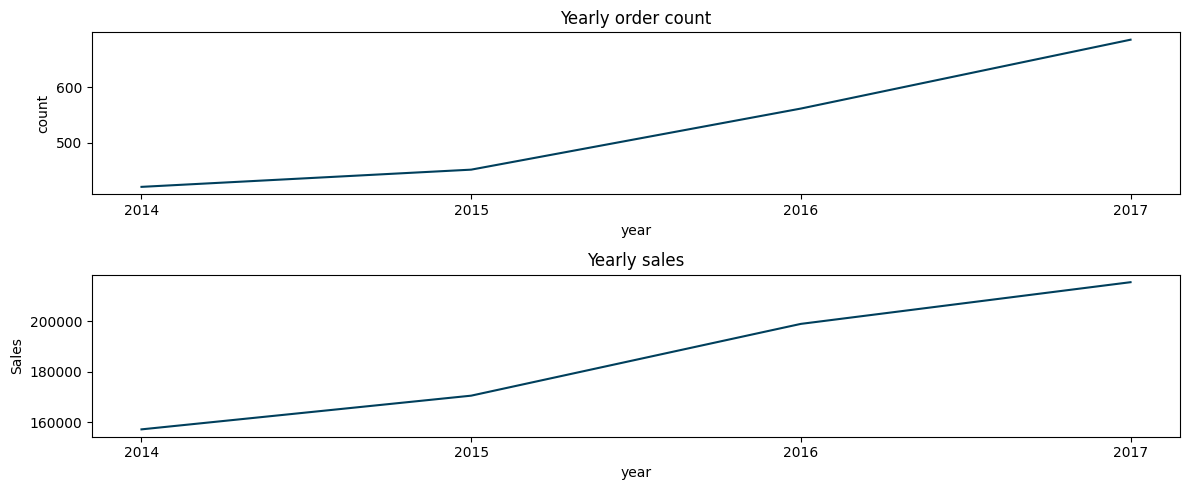

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(211)
df.groupby(['year'])['Order Date'].count().plot(c='#003f5c')
plt.ylabel('count')
plt.xticks(df.groupby(['year'])['Order Date'].count().index)
plt.title('Yearly order count')

plt.subplot(212)
df.groupby('year')['Sales'].sum().plot(c='#003f5c')
plt.ylabel('Sales')
plt.xticks(df.groupby('year')['Sales'].sum().index)
plt.title('Yearly sales')

plt.tight_layout()
plt.show()

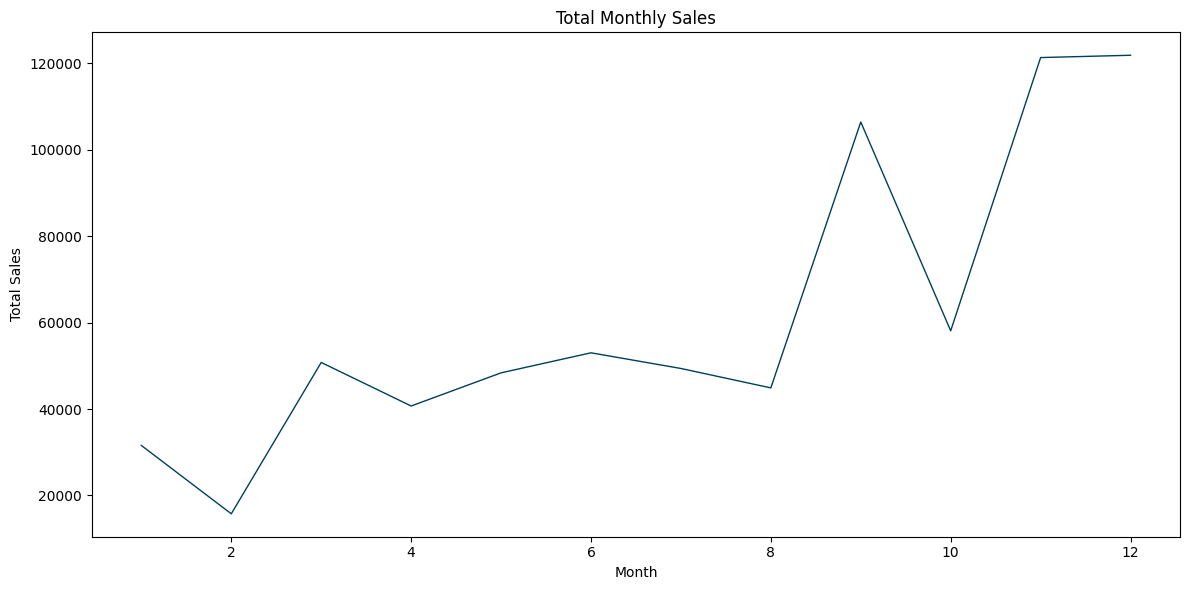

In [ ]:
df.groupby('month')['Sales'].sum().plot(c='#003f5c',linewidth=1,figsize=(12,6))
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

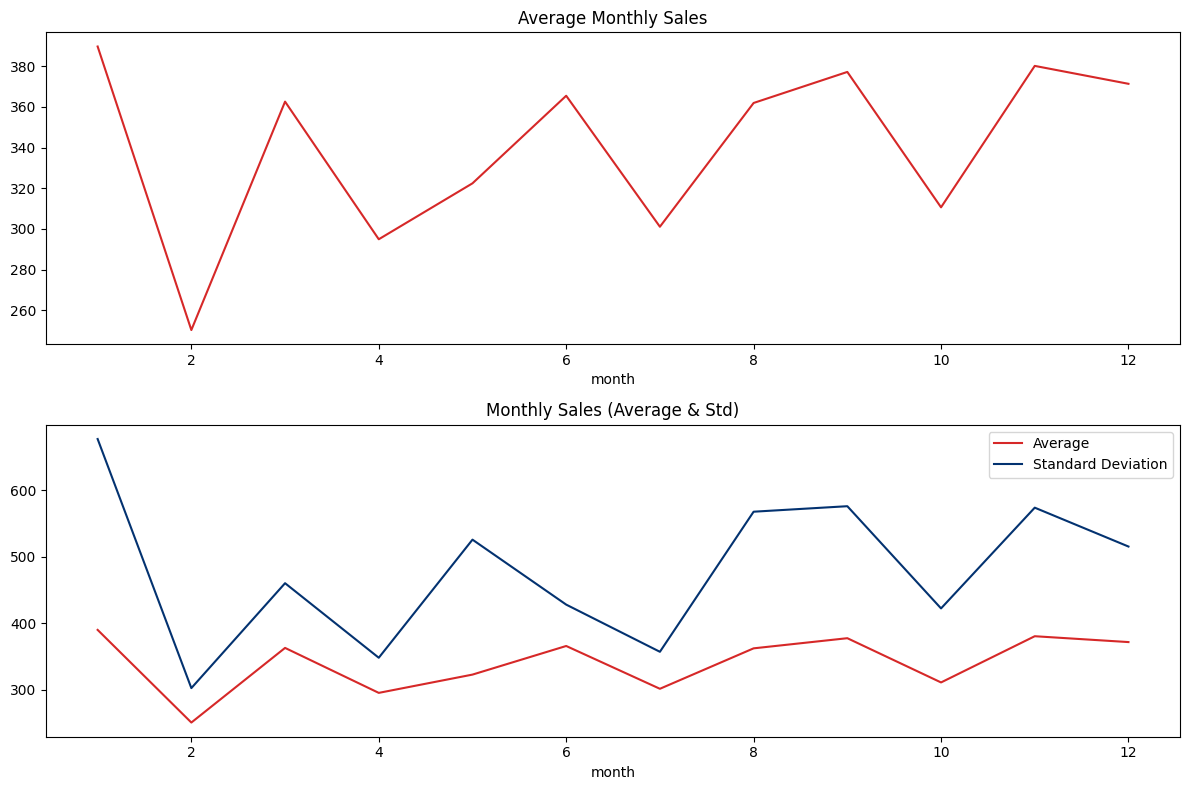

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(211)
df.groupby('month')['Sales'].mean().plot(linewidth=1.5,color='#d62828')
plt.title('Average Monthly Sales')

plt.subplot(212)
df.groupby('month')['Sales'].mean().plot(linewidth=1.5,color='#d62828')
df.groupby('month')['Sales'].describe()['std'].plot(linewidth=1.5,color='#033270')
plt.title('Monthly Sales (Average & Std)')
plt.legend(['Average','Standard Deviation'])

plt.tight_layout()
plt.show()

# Modeling

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'year',
       'month'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

df["Order Date"] = pd.to_datetime(df["Order Date"])

sales_by_category = df.groupby(["Category", df["Order Date"].dt.year])["Sales"].sum().reset_index()

forecasted_sales = pd.DataFrame(columns=["Category", "Forecasted_Sales_2020"])
target_year = 2020

for category in sales_by_category["Category"].unique():
    category_data = sales_by_category[sales_by_category["Category"] == category]

    scaler = MinMaxScaler()
    category_data['Sales'] = scaler.fit_transform(category_data['Sales'].values.reshape(-1, 1))

    X = category_data['Sales'].values
    y = category_data['Sales'].values
    X = X.reshape((X.shape[0], 1, 1))

    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=100, batch_size=16, verbose=0)

    forecast_data = np.array([scaler.transform([[target_year]])])
    forecast_data = forecast_data.reshape((1, 1, 1))

    forecast = model.predict(forecast_data)
    forecast = scaler.inverse_transform(forecast.reshape(-1, 1))[0][0]

    new_row = pd.DataFrame({
        "Category": [category],
        "Forecasted_Sales_2020": [forecast]
    })
    forecasted_sales = pd.concat([forecasted_sales, new_row], ignore_index=True)

forecasted_sales["Forecasted_Sales_2020"] = forecasted_sales["Forecasted_Sales_2020"].apply(lambda x: '{:,.2f}'.format(x))

print("Forecasted Sales in 2020 for Each Product Category:")
print(forecasted_sales)

1/1 [==============================] - 0s 464ms/step
Forecasted Sales in 2020 for Each Product Category:
    Category Forecasted_Sales_2020
0  Furniture            137,225.86


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Grouping the data and resetting the index
sales_by_category = df.groupby(["Category", df["Order Date"].dt.year])["Sales"].sum().reset_index()

# Initialize the DataFrame outside the loop
forecasted_sales = pd.DataFrame(columns=["Category", "Forecasted_Sales_2020"])
target_year = 2020

for category in sales_by_category["Category"].unique():
    category_data = sales_by_category[sales_by_category["Category"] == category]
    category_data = category_data.assign(Year=pd.to_datetime(category_data["Order Date"]).dt.year)
    train_data, valid_data = train_test_split(category_data, test_size=0.2, shuffle=False)
    features = ["Year"]
    target = "Sales"

    train_dataset = lgb.Dataset(train_data[features], label=train_data[target])
    params = {
        "objective": "regression",
        "metric": "mse",
        "boosting_type": "gbdt",
        "num_leaves": 31,
        "learning_rate": 0.05
    }

    model = lgb.train(params, train_dataset, num_boost_round=1000)
    forecast_data = pd.DataFrame({
        "Year": [target_year]
    })

    forecast = model.predict(forecast_data)
    new_row = pd.DataFrame({
        "Category": [category],
        "Forecasted_Sales_2020": [forecast.sum()]
    })
    forecasted_sales = pd.concat([forecasted_sales, new_row], ignore_index=True)

forecasted_sales["Forecasted_Sales_2020"] = forecasted_sales["Forecasted_Sales_2020"].apply(lambda x: '{:,.2f}'.format(x))
print("Forecasted Sales in 2020 for Each Product Category:")
print(forecasted_sales)

result = []
for category in sales_by_category["Category"].unique():
    category_data = sales_by_category[sales_by_category["Category"] == category]
    category_data = category_data.assign(Year=pd.to_datetime(category_data["Order Date"]).dt.year)
    train_data, valid_data = train_test_split(category_data, test_size=0.2, shuffle=False)
    features = ["Year"]
    target = "Sales"

    train_dataset = lgb.Dataset(train_data[features], label=train_data[target])
    model = lgb.train(params, train_dataset, num_boost_round=1000)
    forecast_data = pd.DataFrame({
        "Year": [target_year]
    })

    forecast = model.predict(forecast_data)
    true_values = valid_data[target]
    predicted_values = model.predict(valid_data[features])
    mae = mean_absolute_error(true_values, predicted_values)
    residuals = true_values - predicted_values
    result.append({
        "Category": category,
        "True_Values": true_values.values,
        "Predicted_Values": predicted_values,
        "MAE": mae,
        "Residual": residuals.values
    })

for i in result:
    print(f"Product Category: {i['Category']}")
    print(f"True Values: {i['True_Values']}")
    print(f"Predicted_Values: {i['Predicted_Values']}")
    print(f"MAE: {i['MAE']}")
    print(f"Residual: {i['Residual']}")

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 175537.510417
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

In [ ]:
df['year'].unique()

array([2016, 2015, 2014, 2017])

True Values: [215387.2692]

Predicted_Values:[175537.51041667]